In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [ ]:
!unzip archive.zip

In [ ]:
path = '/content/drive/My Drive/data/flowers/'

IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE =32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    seed=123,
    batch_size=BATCH_SIZE,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    seed=123,
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


(32, 64, 64, 3) (32, 5)


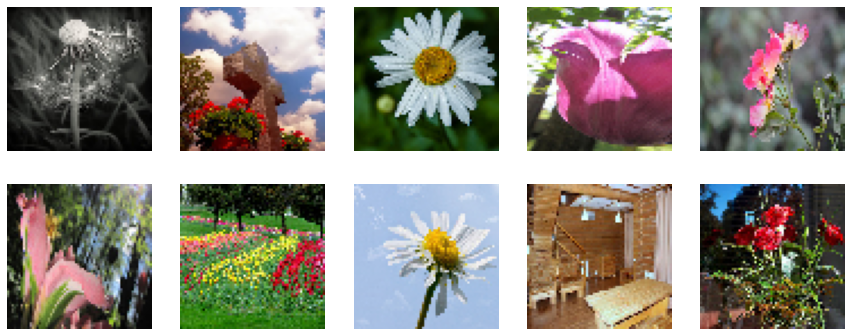

In [ ]:
for x, y in train_generator:
    print(x.shape, y.shape)
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].axis('off')
    plt.show()
    break

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 31, 31, 128)       73856     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 29, 29, 256)       295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 256)      

In [ ]:
#callback

import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

os.makedirs('models', exist_ok=True)
start_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

cp_earlystop = EarlyStopping(monitor='val_loss',
                             mode='min',
                             patience=10,
                             verbose=1)

cp_callback = ModelCheckpoint('models/%s-{epoch:02d}-{val_loss:.2f}.h5' % (start_time),
                              monitor='val_loss',
                              save_best_only=True,
                              mode='min', 
                              verbose=1)

In [ ]:
history = model.fit(train_generator,
                    epochs = 25,
                    validation_data = validation_generator,
                    callbacks=[cp_earlystop, cp_callback])

Epoch 1/25
109/109 [==============================] - 15s 134ms/step - loss: 1.7225 - accuracy: 0.2460 - val_loss: 1.4545 - val_accuracy: 0.3914

Epoch 00001: val_loss improved from inf to 1.45454, saving model to models/2021-05-21_12-23-22-01-1.45.h5
Epoch 2/25
109/109 [==============================] - 15s 139ms/step - loss: 1.3481 - accuracy: 0.4056 - val_loss: 1.1729 - val_accuracy: 0.4832

Epoch 00002: val_loss improved from 1.45454 to 1.17291, saving model to models/2021-05-21_12-23-22-02-1.17.h5
Epoch 3/25
109/109 [==============================] - 15s 138ms/step - loss: 1.1674 - accuracy: 0.4863 - val_loss: 1.0746 - val_accuracy: 0.6005

Epoch 00003: val_loss improved from 1.17291 to 1.07465, saving model to models/2021-05-21_12-23-22-03-1.07.h5
Epoch 4/25
109/109 [==============================] - 15s 139ms/step - loss: 1.0761 - accuracy: 0.5615 - val_loss: 0.9956 - val_accuracy: 0.6144

Epoch 00004: val_loss improved from 1.07465 to 0.99556, saving model to models/2021-05-21_

In [ ]:
from keras.models import load_model

best_model = load_model('models/2021-05-21_12-23-22-10-0.83.h5')
best_model